First unzip the images to a desired folder: !unzip "zip file location -d /destination folder"
Then insert the path value to the directory variable.

In [ ]:
!unzip /content/faces.zip -d /content/
directory ="/content/faces"


# **Φόρτωση εικόνων και διαχωρισμός σε sets**


---



In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image

def loadImages(directory, set_number):
    file_names = [f for f in os.listdir(directory) if f.endswith('.png')]
    image_array = np.zeros((len(file_names), 2500), dtype=np.uint8)

    for i, file_name in enumerate(file_names):
        image_path = os.path.join(directory, file_name)
        image = Image.open(image_path)
        image = image.resize((50, 50)) 
        image = image.convert('L') 
        image_array[i] = np.array(image).reshape((2500,))

    image_array = np.squeeze(image_array)

    sets = {
        "Set_1": [],
        "Set_2": [],
        "Set_3": [],
        "Set_4": [],
        "Set_5": []
    }

    labels_sets = {
        "Set_1": [],
        "Set_2": [],
        "Set_3": [],
        "Set_4": [],
        "Set_5": []
    }

    for i in range(10):
        for j in range(64):
            if j < 7:
                sets["Set_1"].append(image_array[i * 63 + j, :])
                labels_sets["Set_1"].append(i)
            elif j < 18:
                sets["Set_2"].append(image_array[i * 63 + j, :])
                labels_sets["Set_2"].append(i)
            elif j < 30:
                sets["Set_3"].append(image_array[i * 63 + j, :])
                labels_sets["Set_3"].append(i)
            elif j < 44:
                sets["Set_4"].append(image_array[i * 63 + j, :])
                labels_sets["Set_4"].append(i)
            else:
                sets["Set_5"].append(image_array[i * 63 + j, :])
                labels_sets["Set_5"].append(i)

    sets = {k: np.array(v) for k, v in sets.items()}
    labels_sets = {k: np.array(v) for k, v in labels_sets.items()}

    set_number = str(set_number)

    if set_number in sets:
        set_array = np.array(sets[set_number]).T
        labels_array = np.array(labels_sets[set_number]).reshape((1, -1))

        return set_array, labels_array

    else:
        print("Invalid set_number:", set_number)
        return None, None


Αρχικοποίηση των Sets και δημιουργία Sets και Lables πινάκων

In [ ]:

labels_1 = None
labels_2 = None
labels_3 = None
labels_4 = None
labels_5 = None
original_images=[]

for set_number in range(1, 6):
    set_key = "Set_" + str(set_number)
    set_array, labels_array = loadImages(directory, set_key)
    original_images.append(set_array)
    
    
    if set_array is not None and labels_array is not None:
        print("Set " + str(set_number), "Array Shape:", set_array.shape)
        
       
        if set_number == 1:
            labels_1 = labels_array
        elif set_number == 2:
            labels_2 = labels_array
        elif set_number == 3:
            labels_3 = labels_array
        elif set_number == 4:
            labels_4 = labels_array
        elif set_number == 5:
            labels_5 = labels_array
    
    print()


if labels_1 is not None:
    print("Set 1 Labels Shape:", labels_1.shape) 
    print()
if labels_2 is not None:
    print("Set 2 Labels Shape:", labels_2.shape)
    print()
if labels_3 is not None:
    print("Set 3 Labels Shape:", labels_3.shape)
    print()
if labels_4 is not None:
    print("Set 4 Labels Shape:", labels_4.shape)
    print()
if labels_5 is not None:
    print("Set 5 Labels Shape:", labels_5.shape)
    print()




Set 1 Array Shape: (2500, 70)

Set 2 Array Shape: (2500, 110)

Set 3 Array Shape: (2500, 120)

Set 4 Array Shape: (2500, 140)

Set 5 Array Shape: (2500, 200)

Set 1 Labels Shape: (1, 70)

Set 2 Labels Shape: (1, 110)

Set 3 Labels Shape: (1, 120)

Set 4 Labels Shape: (1, 140)

Set 5 Labels Shape: (1, 200)



# **Για d = 30**


---







Υπολογισμός PCA ανά Set






---



In [ ]:
from sklearn.decomposition import PCA
import numpy as np

transformed_data_arrays = []
# n_components
d = 30

for set_number in range(1, 6):
    set_key = "Set_" + str(set_number)
    set_array, labels_array = loadImages(directory, set_key)
    
    if set_array is not None and labels_array is not None:
        set_array_transposed = np.transpose(set_array)
        pca = PCA(n_components=d)
        transformed_data = pca.fit_transform(set_array_transposed)
        transformed_data_arrays.append(transformed_data)
        print("Transformed Data Shape:", transformed_data.shape)

        
    print()


set_1_transformed = transformed_data_arrays[0]
set_2_transformed = transformed_data_arrays[1]
set_3_transformed = transformed_data_arrays[2]
set_4_transformed = transformed_data_arrays[3]
set_5_transformed = transformed_data_arrays[4]


Transformed Data Shape: (70, 30)

Transformed Data Shape: (110, 30)

Transformed Data Shape: (120, 30)

Transformed Data Shape: (140, 30)

Transformed Data Shape: (200, 30)



Υπολογισμός ακρίβειας

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Training data from Set 1
train_data = set_1_transformed
train_labels = labels_1.reshape(-1)  
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with Set 1 data
knn.fit(train_data, train_labels)
print('for d = 30')
print()
# Predicting other sets
for set_number in range(1, 6):
    set_key = "Set_" + str(set_number)
    test_data = globals()["set_" + str(set_number) + "_transformed"]
    test_labels = globals()["labels_" + str(set_number)]
    predicted_labels = knn.predict(test_data)
    accuracy = np.mean(predicted_labels == test_labels) * 100
    formatted_accuracy = format(accuracy, ".2f")
    
    print("Accuracy for", set_key, ":", formatted_accuracy, "%")
    print()
    


for d = 30

Accuracy for Set_1 : 100.00 %

Accuracy for Set_2 : 8.18 %

Accuracy for Set_3 : 10.00 %

Accuracy for Set_4 : 8.57 %

Accuracy for Set_5 : 10.50 %



Βλέπουμε ότι η γενίκευση για τα set 2-5 είναι πολύ χαμηλή. Οπότε η δυνατότητα γενίκευσης είναι περιορισμένη.

In [ ]:
import numpy as np
set_1_transformed = np.array(set_1_transformed)
covariance_matrix = np.cov(set_1_transformed, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = sorted_eigenvectors[:, :9]
print(top_eigenvectors)


In [ ]:
import random
image_array_30_rep = []
image_array_30_orig= []

for set_number in range(5):
  numberOfImage = random.randint(0,70)
  pca = PCA(n_components=d)
  transformed_data = pca.fit_transform(np.transpose(original_images[set_number]))
  reproduced = pca.inverse_transform(transformed_data)

  image_array_30_rep = np.reshape(reproduced[numberOfImage], (50, 50))

  image_array_30_orig = np.reshape(np.transpose(original_images[set_number])[numberOfImage], (50, 50))

# **Για d = 9**

---


In [ ]:
transformed_data_arrays = []
# n_components
d = 9

for set_number in range(1, 6):
    set_key = "Set_" + str(set_number)
    set_array, labels_array = loadImages(directory, set_key)
    
    if set_array is not None and labels_array is not None:
        set_array_transposed = np.transpose(set_array)
        pca = PCA(n_components=d)
        transformed_data = pca.fit_transform(set_array_transposed)
        transformed_data_arrays.append(transformed_data)
        print('Set:',set_number,'\n',"Transformed Data Shape:", transformed_data.shape)

        
    print()


set_1_transformed = transformed_data_arrays[0]
set_2_transformed = transformed_data_arrays[1]
set_3_transformed = transformed_data_arrays[2]
set_4_transformed = transformed_data_arrays[3]
set_5_transformed = transformed_data_arrays[4]


Set: 1 
 Transformed Data Shape: (70, 9)

Set: 2 
 Transformed Data Shape: (110, 9)

Set: 3 
 Transformed Data Shape: (120, 9)

Set: 4 
 Transformed Data Shape: (140, 9)

Set: 5 
 Transformed Data Shape: (200, 9)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Training data from Set 1
train_data = set_1_transformed
train_labels = labels_1.reshape(-1)  
knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with Set 1 data
knn.fit(train_data, train_labels)
print('for d = 30')
print()
# Predicting other sets
for set_number in range(1, 6):
    set_key = "Set_" + str(set_number)
    test_data = globals()["set_" + str(set_number) + "_transformed"]
    test_labels = globals()["labels_" + str(set_number)]
    predicted_labels = knn.predict(test_data)
    accuracy = np.mean(predicted_labels == test_labels) * 100
    formatted_accuracy = format(accuracy, ".2f")
    
    print("Accuracy for", set_key, ":", formatted_accuracy, "%")
    print()


for d = 30

Accuracy for Set_1 : 100.00 %

Accuracy for Set_2 : 7.27 %

Accuracy for Set_3 : 8.33 %

Accuracy for Set_4 : 10.71 %

Accuracy for Set_5 : 9.50 %



Βλέπουμε ότι και εδώ η δυνατότητα γενίκευσης είναι περιορισμένη.

In [ ]:
import numpy as np

set_1_transformed = np.array(set_1_transformed)
covariance_matrix = np.cov(set_1_transformed, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
top_eigenvectors = sorted_eigenvectors[:, :9]
print(top_eigenvectors)


[[ 1.00000000e+00  3.78629573e-16 -1.65218835e-17 -5.53381535e-18
   6.92600021e-19 -9.63170249e-18 -3.05044019e-18  5.45101276e-18
   5.27608632e-18]
 [ 0.00000000e+00 -1.00000000e+00 -1.41818230e-16 -6.58035559e-17
   5.05471793e-18 -1.56009213e-17 -1.79004081e-17  1.43642254e-17
   3.79809860e-17]
 [ 0.00000000e+00  7.50915884e-17 -1.00000000e+00 -5.78891116e-16
   6.05264136e-16 -1.35429899e-16 -1.66970082e-17 -3.36849548e-17
  -2.23765958e-17]
 [ 0.00000000e+00 -1.34236660e-16 -2.85091633e-16  1.00000000e+00
   5.58912257e-15 -1.04470685e-15  2.07414170e-16 -2.35049447e-17
   2.65806160e-16]
 [ 0.00000000e+00  5.36427270e-18  6.55544502e-16 -6.74807432e-15
   1.00000000e+00  6.97038818e-16 -1.39644076e-16  3.45923878e-16
   3.75454465e-16]
 [ 0.00000000e+00  5.29618812e-17 -2.44909803e-16 -1.04633021e-15
   1.35533951e-15 -1.00000000e+00  9.48407567e-16  3.35505536e-16
   7.11507162e-16]
 [ 0.00000000e+00 -1.51387897e-17 -2.71504201e-17 -1.60566972e-17
   2.65799405e-16  1.1509832

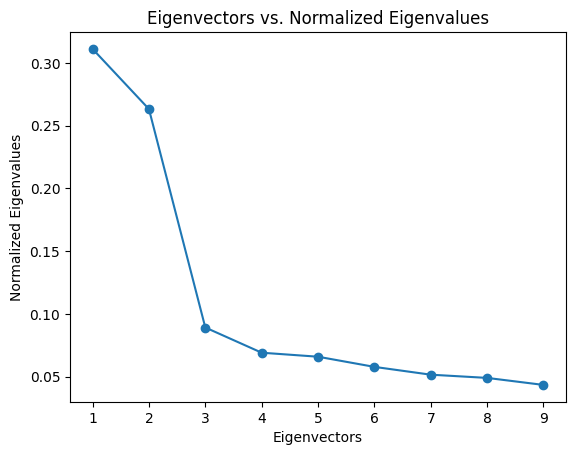

In [ ]:
import matplotlib.pyplot as plt

top_eigenvectors = np.array(set_1_transformed)  
eigenvalues = np.linalg.norm(top_eigenvectors, axis=0)
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)
fig, ax = plt.subplots()
ax.plot(range(1, 10), normalized_eigenvalues, marker='o')
ax.set_xlabel('Eigenvectors')
ax.set_ylabel('Normalized Eigenvalues')
ax.set_title('Eigenvectors vs. Normalized Eigenvalues')
plt.show()


Τα κύρια ιδιοδιανύσματα του PCA (Principal Component Analysis) αντιπροσωπεύουν τις κύριες συνιστώσες που αποτυπώνουν τη μεγαλύτερη ποσότητα της διακύμανσης στα δεδομένα. Aντιπροσωπεύουν την πληροφορία που είναι πιο σημαντική για την αναπαράσταση των προσώπων και την αναγνώρισή τους. Με τη χρήση αυτών των ιδιοδιανυσμάτων, μπορούμε να εξάγουμε τα σημαντικότερα χαρακτηριστικά και να μειώσουμε τις διαστάσεις των εικόνων προσώπων, επιτρέποντας την αποτελεσματική αναγνώριση τους.

# **Απεικόνιση και σύγκριση εικόνων (Αρχική / PCA(n=9) / PCA(n=30)**



---



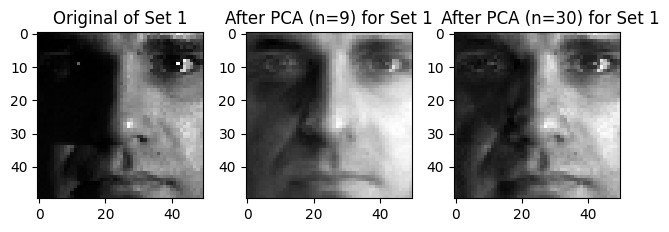

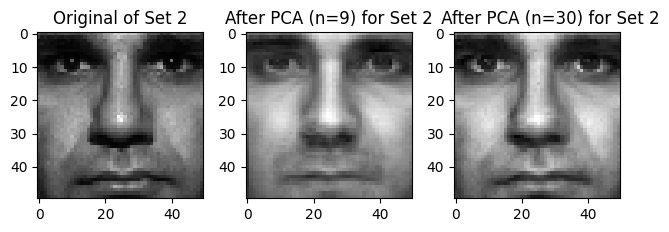

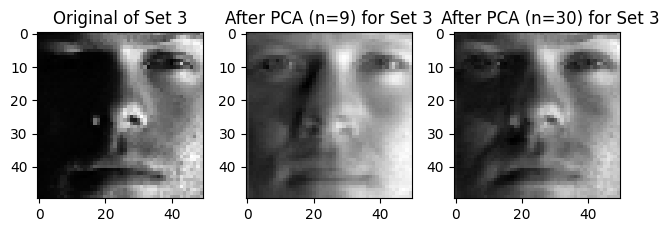

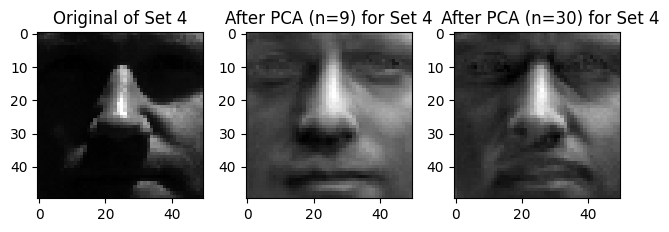

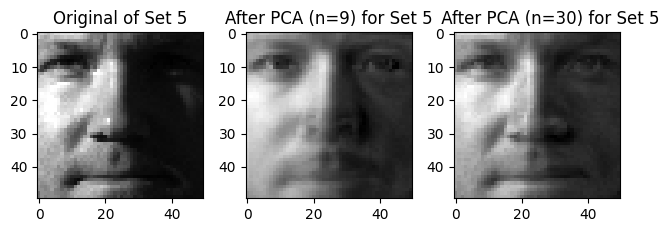

In [ ]:
import random
import matplotlib.pyplot as plt


for set_number in range(5):
  d = 9
  numberOfImage = random.randint(0, 70)
  pca = PCA(n_components=d)
  transformed_data = pca.fit_transform(np.transpose(original_images[set_number]))
  reproduced = pca.inverse_transform(transformed_data)

  image_array = np.reshape(reproduced[numberOfImage], (50, 50))
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
  ax2.imshow(image_array, cmap='gray')
  ax2.set_title('After PCA (n=9) for Set ' + str(set_number + 1))
  
  image_array = np.reshape(np.transpose(original_images[set_number])[numberOfImage], (50, 50))
  ax1.imshow(image_array, cmap='gray')
  ax1.set_title('Original of Set ' + str(set_number + 1))
  
  d = 30
  pca = PCA(n_components=d)
  transformed_data = pca.fit_transform(np.transpose(original_images[set_number]))
  reproduced = pca.inverse_transform(transformed_data)

  image_array = np.reshape(reproduced[numberOfImage], (50, 50))  # Updated line
  ax3.imshow(image_array, cmap='gray')
  ax3.set_title('     After PCA (n=30) for Set ' + str(set_number + 1))

  plt.tight_layout()
  plt.show()

  print()


Βλέπουμε ότι γενικότερα οι εικόνες με PCA για d=30 είναι πιο κοντά και πιο ευκρινείς στις πραγματικές από ότι για d=9, όπου είναι πιο 'θολές'.

#  **SVD to Set_1**


---



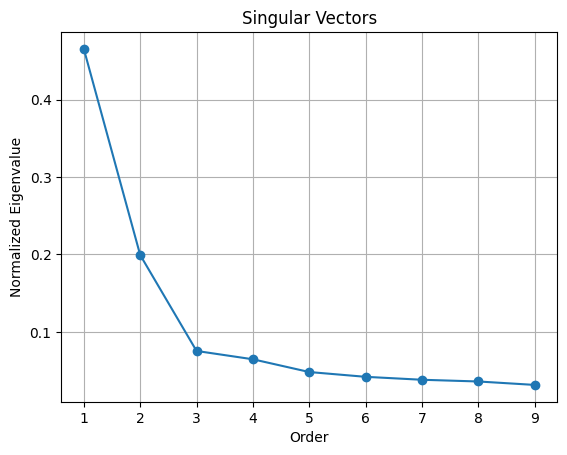

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Set_1 = np.zeros((70, 2500))
Set_1, labels = loadImages(directory, 'Set_1')
Set_1 = np.transpose(Set_1)
U, s, V = np.linalg.svd(Set_1, full_matrices=False)
main_singular_values = s[:9]
normalized_eigenvalues = main_singular_values / np.sum(main_singular_values)
plt.plot(range(1, 10), normalized_eigenvalues, 'o-')
plt.xlabel('Order')
plt.ylabel('Normalized Eigenvalue')
plt.title('Singular Vectors')
plt.grid(True)
plt.show()


Βλέπουμε ότι τα ιδιοδιανύσματα απο τα singular vectors διαφέρουν ελάχιστα. Αυτό συμβαίνει γιατί τα ιδιοδιανύσματα αναφέρονται σε έναν συγκεκριμένο γραμμικό μετασχηματισμό, ενώ τα singular vectors προέρχονται από την αποσύνθεση ενός πίνακα με χρήση της μεθόδου SVD και αναπαριστούν τις κατευθύνσεις των διακυμάνσεων των δεδομένων.

# **ΕΡΩΤΗΜΑ 2**

---



Load MNIST and normalize

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the training data
train = x_train.reshape((x_train.shape[0], -1)) / 255.0
trlab = y_train

# Reshape and normalize the test data
test = x_test.reshape((x_test.shape[0], -1)) / 255.0
tslab = y_test

# Print the shapes of the training and test sets
print("Training data shape:", train.shape)
print("Training labels shape:", trlab.shape)
print("Test data shape:", test.shape)
print("Test labels shape:", tslab.shape)


Training data shape: (60000, 784)
Training labels shape: (60000,)
Test data shape: (10000, 784)
Test labels shape: (10000,)


SVM for default values 



---




In [3]:
svm = LinearSVC(dual=False)
svm.fit(train, trlab)

LinearSVC(dual=False)

In [4]:
svm.coef_
svm.intercept_

array([-1.20868021, -0.13544125, -0.81833551, -1.19362507, -0.50978213,
        0.03590189, -1.14999554, -0.24128208, -2.08582088, -1.32431588])

In [5]:
pred = svm.predict(test)
accuracy_score(tslab, pred)*100


91.84

Βλέπουμε ότι το SVM μοντέλο για τις default τιμές, δίνει ακρίβεια 91,84% στα δεδομένα του MNIST.


---



---


Linear SVC for multiple cost factors and gamma values




In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernel_types = ['linear', 'rbf']
C_values = [0.001, 0.01, 0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1]  

best_accuracy = 0
best_params = {}

for kernel in kernel_types:
    for C in C_values:
        for gamma in gamma_values:
            svm = SVC(kernel=kernel, C=C, gamma=gamma)
            svm.fit(train, trlab)  
            pred_train = svm.predict(train)
            accuracy_train = accuracy_score(trlab, pred_train)
            pred_test = svm.predict(test)
            accuracy_test = accuracy_score(tslab, pred_test)
            if accuracy_test > best_accuracy:
                best_accuracy = accuracy_test
                best_params = {'Kernel': kernel, 'C': C, 'Gamma': gamma}

print('Best Parameters:', best_params)
print('Training Accuracy:', accuracy_train)
print('Test Accuracy:', accuracy_test)
